In [23]:
import numpy as np
import os.path
import urllib
import gzip
import itertools
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
fig_size = [8, 8]
plt.rcParams["figure.figsize"] = fig_size

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/font_manager.py:279: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


In [6]:
def fasta_reader(filename):
  from Bio.SeqIO.FastaIO import FastaIterator
  with open(filename) as handle:
    for record in FastaIterator(handle):
      yield record

In [13]:

for entry in fasta_reader("sequence.fasta"):
  genome = str(entry.seq) #This is sequence of specific fasta entry

In [25]:
GENOMESIZE = len(genome)

letters=list(set(genome))

In [15]:
BLOCKSIZE=300
WORDSIZE=[1,2,3,4]
NBLOCKS=GENOMESIZE//BLOCKSIZE

In [26]:
def getFeatures(genome, NBLOCKS, WORDSIZE):
    features={x : np.zeros((NBLOCKS, 4**x)) for x in WORDSIZE}
    for ws in WORDSIZE:
        lookUp = { y : x for x,y in enumerate([''.join(l) for l in itertools.product(*[letters]*ws)]) }
        for b in range(NBLOCKS):
            block = genome[b*BLOCKSIZE:(b+1)*BLOCKSIZE]
            for i in range(BLOCKSIZE//ws):
                word = block[i*ws:(i+1)*ws]
                features[ws][b,lookUp[word]] += 1
    return features

features = getFeatures(genome, NBLOCKS, WORDSIZE)

In [27]:
def standardize(features, WORDSIZE):
    for ws in WORDSIZE:
        std_scale = preprocessing.StandardScaler().fit(features[ws])
        features[ws] = std_scale.transform(features[ws])
    return features

features = standardize(features, WORDSIZE)

In [28]:
def runPCA(features, WORDSIZE, n_components=2):
    featuresPCA={}
    for ws in WORDSIZE:
        pca = PCA(n_components=n_components).fit(features[ws])
        featuresPCA[ws] = pca.transform(features[ws])
    return featuresPCA

featuresPCA = runPCA(features, WORDSIZE)

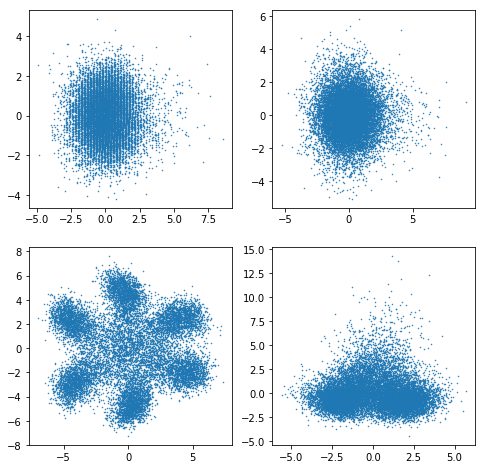

In [29]:

fig, axes = plt.subplots(2,2)
axes[0,0].scatter(featuresPCA[1].T[0], featuresPCA[1].T[1], s=0.25)
axes[0,1].scatter(featuresPCA[2].T[0], featuresPCA[2].T[1], s=0.25)
axes[1,0].scatter(featuresPCA[3].T[0], featuresPCA[3].T[1], s=0.25)
axes[1,1].scatter(featuresPCA[4].T[0], featuresPCA[4].T[1], s=0.25)

In [33]:
kmeans = KMeans(n_clusters=7, random_state=0).fit(features[3])

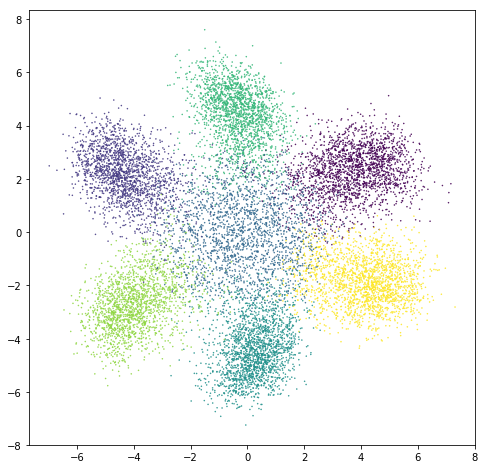

In [34]:
fig, ax = plt.subplots(1,1)
ax.scatter(featuresPCA[3].T[0], featuresPCA[3].T[1], s=0.25, c=kmeans.labels_)